In [1]:
from IPython.display import display, HTML

full_parchment_style_with_headings = """
<style>
  /* Container */
  .notes-container {
    margin: 2em auto;
    max-width: 900px;
    font-family: 'Palatino Linotype', 'Book Antiqua', Palatino, serif;
    background: #f7f1e1; /* warm cream parchment */
    padding: 2em 3em;
    border-radius: 16px;
    box-shadow: 0 6px 15px rgba(100, 80, 40, 0.15);
    color: #5b4a2e;
  }

  /* Cards styled like aged parchment */
  .note-card {
    background: linear-gradient(135deg, #fdf6e3 0%, #f3ead6 100%);
    border: 1.5px solid #d1bfa7;
    border-radius: 14px;
    padding: 2.5em 3em;
    margin-bottom: 2.8em;
    box-shadow:
      inset 0 0 15px 2px #f0e5cc,
      0 5px 20px rgba(121, 100, 52, 0.15);
    transition: box-shadow 0.3s ease;
  }
  .note-card:hover {
    box-shadow:
      inset 0 0 20px 3px #f3ead6,
      0 8px 28px rgba(121, 100, 52, 0.25);
  }

  /* Headings outside cards */
  h1, h2 {
    font-family: 'Goudy Old Style', serif;
    color: #6a573a;
    text-shadow: 1px 1px 0 #e6dac3;
  }
  h1 {
    font-size: 3em;
    font-weight: 700;
    margin-bottom: 0.7em;
    border-bottom: 4px solid #cbb991;
    padding-bottom: 0.4em;
  }
  h2 {
    font-size: 2.2em;
    font-weight: 600;
    margin-bottom: 0.6em;
    border-bottom: 2px solid #d1bfa7;
    padding-bottom: 0.3em;
  }

  /* Headings inside cards */
  .note-card h3 {
    font-family: 'Goudy Old Style', serif;
    font-size: 1.8em;
    font-weight: 600;
    color: #7a6645;
    margin-top: 2.5em;
    margin-bottom: 0.8em;
    border-bottom: 2px solid #d1bfa7;
    padding-bottom: 0.3em;
  }

  /* Text styles */
  .note-card p,
  .note-card li,
  .note-card ol li,
  .note-card table td,
  .note-card table th {
    font-size: 17px;
    line-height: 1.55;
    color: #5b4a2e;
  }
  .note-card p {
    margin-bottom: 1.5em;
  }

  /* Lists */
  .note-card ul {
    list-style-type: square;
    margin-left: 1.8em;
    padding-left: 0.5em;
  }
  .note-card li {
    margin-bottom: 1em;
  }
  .note-card ol {
    margin-left: 1.8em;
    padding-left: 0.5em;
  }
  .note-card ol li {
    margin-bottom: 1.3em;
  }

  /* Tables */
  .note-card table {
    width: 100%;
    border-collapse: separate;
    border-spacing: 0;
    font-family: 'Georgia', serif;
    background: #faf2d6;
    border-radius: 12px;
    box-shadow: inset 0 0 8px #dbcea4;
    color: #6c5d3c;
    font-size: 17px;
  }
  .note-card thead tr {
    background-color: #e8dca5;
  }
  .note-card thead th {
    padding: 1em 1.5em;
    border-bottom: 2px solid #cbb991;
    text-align: left;
    font-weight: 600;
  }
  .note-card tbody tr {
    background: #faf2d6;
  }
  .note-card tbody td {
    padding: 1em 1.5em;
    border-bottom: 1px solid #d1bfa7;
    vertical-align: top;
  }
  .note-card tbody tr:last-child td {
    border-bottom: none;
  }

  /* Math emphasis block */
  .math-center {
    text-align: center;
    font-size: 15px;
    color: #7d6b43;
    background: #f9f3d4;
    padding: 1.2em 1.8em;
    border-radius: 14px;
    margin-top: 1.6em;
    margin-bottom: 2em;
    font-style: italic;
    box-shadow: inset 0 0 10px rgba(120,100,40,0.12);
  }

  /* Info callout */
  .info {
    display: inline-block;
    background-color: #f1e6c9;
    color: #796e45;
    font-weight: 600;
    padding: 0.5em 1em;
    border-radius: 10px;
    box-shadow: 0 2px 5px rgba(120, 110, 50, 0.18);
  }
</style>

"""

display(HTML(full_parchment_style_with_headings))

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

/home/mustafa/miniconda3/envs/t2/lib/python3.13/site-packages/numpy/_core/getlimits.py:551: UserWarning: Signature b'\x00\xd0\xcc\xcc\xcc\xcc\xcc\xcc\xfb\xbf\x00\x00\x00\x00\x00\x00' for <class 'numpy.longdouble'> does not match any known type: falling back to type probe function.
This warnings indicates broken support for the dtype!
  machar = _get_machar(dtype)


# Formulas 

## 1. Multinomial (Softmax) Formulation

$P(y=k|\mathbf{x}) = \frac{e^{\mathbf{w}_k^T \mathbf{x} + b_k}}{\sum_{j=1}^K e^{\mathbf{w}_j^T \mathbf{x} + b_j}}$

$\text{where } \mathbf{x} \in \mathbb{R}^n, \mathbf{w}_k \in \mathbb{R}^n, b_k \in \mathbb{R}$

---

## 2. Multiclass Cross Entropy Loss

$\mathcal{L}(\mathbf{W}) = -\frac{1}{N}\sum_{i=1}^N \sum_{k=1}^K y_{ik} \log(P(y_i=k|\mathbf{x}_i))$

$\text{with } y_{ik} = \begin{cases} 
1 & \text{if } y_i = k \\
0 & \text{otherwise}
\end{cases}$

$\hat{y} = \underset{k}{\mathrm{argmax}} \, P(y=k|\mathbf{x})$

---

## 3. Predictions

$\hat{y} = \underset{k}{\mathrm{argmax}} \, P(y=k|\mathbf{x})$


# The Model

In [3]:
class MultiClassLogisticRegression:
    def __init__(self, learning_rate=0.1, number_of_epochs=1000,
                 verbose=False, log_every = 100,
                 regularize=False, regularization_strength=0.01, regularization_type='l2',
                 ):
        
        self.learning_rate = learning_rate
        self.number_of_epochs = number_of_epochs

        self.verbose = verbose
        self.log_every = log_every
        self.regularize = regularize
        self.regularization_strength = regularization_strength
        self.regularization_type = regularization_type

        self.loss_history = []
        self.weights_history= []   # optional

        self.weights = None
        self.bias    = None
        
        self.label_encoder = LabelEncoder()
        self.classes_ = None  # store original class labels


    def _softmax(self, z : np.ndarray):
        if z.ndim == 1:
            z = z - np.max(z)
            exp_z = np.exp(z)
            sum_exp_z = np.sum(exp_z)
            probabilities = (exp_z / sum_exp_z)
            return probabilities.reshape(1, -1)  # force (1, n_classes)
        else:
            z = z - np.max(z, axis=1, keepdims=True)
            exp_z = np.exp(z)
            sum_exp_z = np.sum(exp_z, axis=1, keepdims=True)
            probabilities = exp_z / sum_exp_z
            return probabilities

    
    def _multi_class_cross_entropy(self, y, y_hat):
        epsilon = 1e-10
        m = y.shape[0]    # n_samples

        loss = -np.sum(y * np.log(y_hat + epsilon)) / m
        
        return loss


    def _compute_loss(self, y, y_hat):
        loss = self._multi_class_cross_entropy(y, y_hat)

        m = y.shape[0]

        if self.regularize:
            l2_term = (self.regularization_strength / (2 * m)) * np.sum(self.weights ** 2)
            loss += l2_term

        self.loss_history.append(loss)
        return loss
    

    def _forward_propagation(self, X):
        z = X @ self.weights + self.bias  # works with shape (n_samples, n_classes) + (n_classes,)
        y_hat = self._softmax(z)
        return y_hat
    

    def _backward_propagation(self, X, y, y_hat):
        m = y.shape[0]
        error = y_hat - y  # (n_samples, n_classes)
        bias_derivative = np.mean(error, axis=0)
        weights_derivative = 1 / m * X.T @ error

        if self.regularize:
            weights_derivative += (self.regularization_strength / m) * self.weights    # derivative of l2 term in _compute_loss()
            
        return weights_derivative, bias_derivative


    def _update(self, weights_derivative, bias_derivative):
        self.weights_history.append(np.linalg.norm(self.weights))
        
        self.weights -= self.learning_rate * weights_derivative
        self.bias    -= self.learning_rate * bias_derivative


    def _init_params(self, n_features, n_classes):
        self.weights = np.random.normal(0, 0.01, size=(n_features, n_classes))  # (n_features, n_classes)
        self.bias = np.zeros(n_classes)   # (n_classes, )


    def fit(self, X, y):
        # convet to numpy arrays
        X = np.asarray(X, dtype=float)
        y = np.asarray(y, dtype=float)
        
        # encode labels safely
        y_encoded = self.label_encoder.fit_transform(y)
        self.classes_ = self.label_encoder.classes_
        n_classes = len(self.classes_)
        y_onehot = np.eye(n_classes)[y_encoded]

        self._init_params(X.shape[1], y_onehot.shape[1])

        for i in range(self.number_of_epochs):
            y_hat = self._forward_propagation(X)
            current_loss = self._compute_loss(y_onehot, y_hat)
            weights_derivative, bias_derivative = self._backward_propagation(X, y_onehot, y_hat)
            self._update(weights_derivative, bias_derivative)

            if(self.verbose and (i % self.log_every == 0 or i == self.number_of_epochs - 1)):
                print(f'Epoch: {i} | Loss: {current_loss:.2f} | Weights Norm: {np.linalg.norm(self.weights):.2f}')

        return self
    

    def predict_proba(self, X):
        X = np.asarray(X, dtype=float)  # if X is a dataframe, turn it to numpy array
        return self._forward_propagation(X)

    def predict(self, X):
        probs = self.predict_proba(X)
        y_pred_encoded = np.argmax(probs, axis=1)
        return self.label_encoder.inverse_transform(y_pred_encoded)


    def plot_loss(self, ax=None, plot_weights=False):
        '''
            | Scenario                       | Loss Shape                  | Weights Norm Shape               | Meaning                                                   |
            | ------------------------------ | --------------------------- | -------------------------------- | --------------------------------------------------------- |
            | **Good training**              | Decreasing → plateaus low   | Increasing → plateaus moderately | Model learns well, weights controlled.                    |
            | **Overfitting / divergence**   | Loss decreasing or unstable | Weights norm grows without bound | Model memorizes, very large weights, poor generalization. |
            | **Underfitting / no learning** | Loss remains high           | Weights norm remains very low    | Model fails to learn, weights stuck near init.            |
        '''

        if ax is None:
            ax = plt.gca()
        sns.lineplot(x=range(len(self.loss_history)), y=self.loss_history, label=f'Final loss: {self.loss_history[-1]:.2f}',ax=ax)
        ax.set_xlabel('Epochs')
        ax.set_ylabel('Loss')
        ax.set_title('Training Loss')
        ax.grid(alpha=0.3)
        ax.legend()


        if plot_weights:
            ax2 = ax.twinx()
            sns.lineplot(x=range(len(self.weights_history)), y=self.weights_history, color='orange', label='Weights Norm', ax=ax2)
            ax2.set_ylabel('Weights Norm')
            ax2.legend()

### How to know if the upper limit on weights norm is high or not:
* It depends on your data and model scale
* The absolute value of the weights norm depends heavily on:
    1. Number of features (higher dims → naturally larger norm).
    
    2. Feature scaling (standardized data keeps weights smaller and more comparable).
    
    3. Regularization strength (stronger L2 keeps norm smaller).
    
* So no fixed universal cutoff exists.

---
# MNIST digits dataset
---

In [4]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

In [5]:
data = load_digits()

features = data.data
target = data.target

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.25, stratify=target, random_state=42, shuffle=True)

print(pd.Series(target).value_counts().sort_index())

0    178
1    182
2    177
3    183
4    181
5    182
6    181
7    179
8    174
9    180
Name: count, dtype: int64


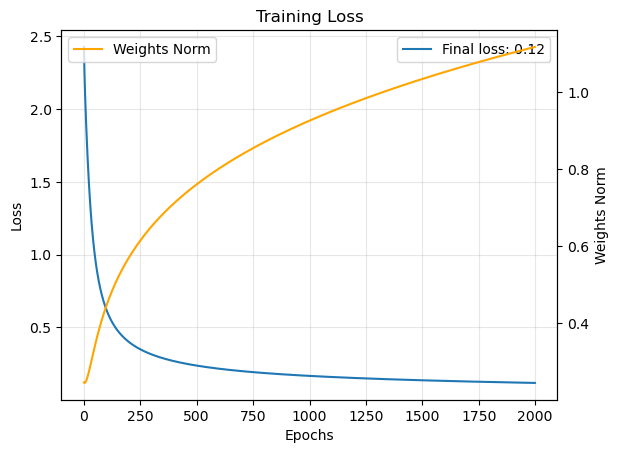

In [6]:
pipe = Pipeline([
    ('model', MultiClassLogisticRegression(learning_rate=0.001, verbose=False, log_every=200, number_of_epochs=2000, regularize=True, regularization_strength=0.5)),
])

pipe.fit(X_train, y_train)
pipe['model'].plot_loss(plot_weights=True)

In [7]:
from sklearn.metrics import accuracy_score

training_predictions = pipe.predict(X_train)
predictions = pipe['model'].predict(X_test)

training_accuracy = accuracy_score(y_train, training_predictions)  # to check if overfit
accuracy = accuracy_score(y_test, predictions)

print(f' Training Accuracy: {training_accuracy:.2f} | Testing Accuracy: {accuracy:.2f}')

 Training Accuracy: 0.98 | Testing Accuracy: 0.97


[[44  0  0  0  1  0  0  0  0  0]
 [ 0 43  0  0  0  1  1  0  1  0]
 [ 0  0 44  0  0  0  0  0  0  0]
 [ 0  0  0 46  0  0  0  0  0  0]
 [ 0  0  0  0 45  0  0  0  0  0]
 [ 0  0  0  0  0 45  0  0  0  1]
 [ 0  1  0  0  0  0 43  0  1  0]
 [ 0  0  0  0  0  0  0 45  0  0]
 [ 0  3  0  0  0  0  0  1 39  0]
 [ 0  0  0  0  1  0  0  0  1 43]]


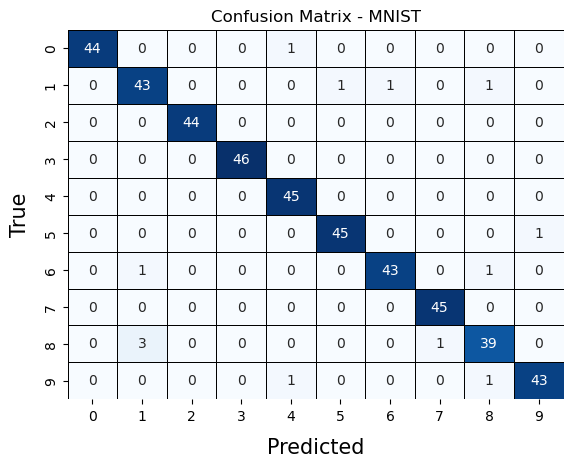

In [8]:
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y_test, predictions)

sns.heatmap(conf_mat, annot=True, cmap='Blues', cbar=False, linewidths=0.5, linecolor='black',
            xticklabels=data.target_names, yticklabels=data.target_names)

plt.xlabel('Predicted', fontsize=15, labelpad=10)
plt.ylabel('True', fontsize=15, labelpad=10)
plt.title('Confusion Matrix - MNIST');

print(conf_mat)

# ROC Curves: Individual vs Averaged - Decision Guide

## **Which Is Better Than Individual Curves?**

### **When to prefer averages:**
- If you have many classes (≥5), curves overlap, and you need a **clean summary**
- If your dataset is balanced, **micro** and **macro** will be very close → either works

### **When to keep individual curves:**
- If you want to **diagnose class-specific problems**
- If you suspect your model is failing on certain rare or confusing classes
- If you need to show which classes are hardest

## Summary

### **For MNIST-like tasks** where nearly everything is AUC/AP ~1.00:
👉 Use **macro** average in your plots. It's cleaner, and fairness across digits isn't a big issue.

### **For imbalanced problems** (e.g. fraud detection, medical rare disease):
👉 Report **both micro and macro**.
- **Micro** tells you how well the system performs overall
- **Macro** tells you if the rare classes are being crushed or ignored

### **For debugging or a paper appendix:**
👉 Show **per-class curves + macro/micro summary**. That way reviewers/stakeholders see both the forest and the trees.

## ⚡ TL;DR:
- **Macro = fairness across classes**
- **Micro = raw overall accuracy**  
- If your per-class curves overlap near-perfect, **macro-only is usually the clearest choice**

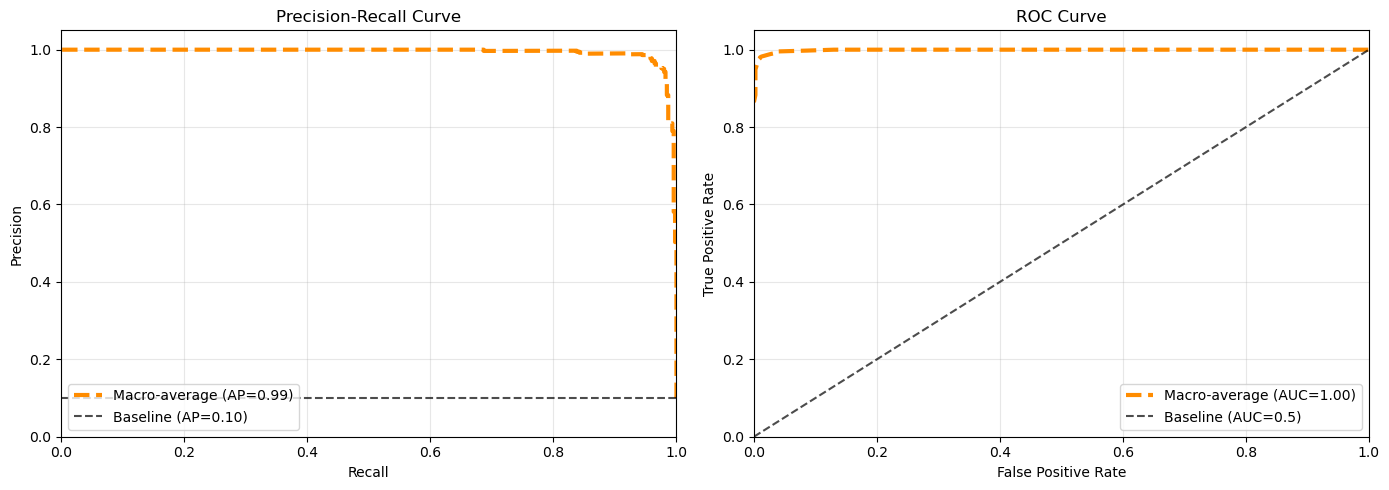

In [9]:
import sys
sys.path.append('../../')
from my_utils.classification_eval_plots import ClassificationEvaluationPlots

probabilities = pipe['model'].predict_proba(X_test)

classes = np.unique(target)

figure, axes = plt.subplots(1, 2, figsize=(14,5))
ClassificationEvaluationPlots.plot_precision_recall_curve_multiclass(y_test, probabilities, classes, average='macro', show_only_average=True, ax=axes[0])
ClassificationEvaluationPlots.plot_roc_curve_multiclass(y_test, probabilities, classes, average='macro', show_only_average=True, ax=axes[1])
figure.tight_layout()